# Customer Segmentation

In [ ]:
## import lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## load data
df = pd.read_excel('data.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [ ]:
df_not_nan = df[df['CustomerID'].notna()]
df_not_nan.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df_not_nan['InvoiceDate'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  406829
unique                  20460
top       2011-11-14 15:27:00
freq                      543
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [ ]:
## convert InvoiceDate to date
df_not_nan['InvoiceDate'] = pd.to_datetime(df_not_nan['InvoiceDate'],format = '%Y-%m-%d-%H-%M-%S')
df_not_nan['InvoiceDate']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [ ]:
import datetime
current_date = max(df_not_nan['InvoiceDate']) + datetime.timedelta(days=1)
## tinh M - MoneytaryValue
df_not_nan['TotalPay'] = df_not_nan['Quantity'] * df_not_nan['UnitPrice']
## group by CustomerID tinh R,M,F
df_customers = df_not_nan.groupby(['CustomerID']).agg(
    {'InvoiceDate' : lambda x: (current_date-x.max()).days,
     'InvoiceNo': 'count',
     'TotalPay':'sum'
     }
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_customers.head()

,InvoiceDate,InvoiceNo,TotalPay
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [ ]:
df_customers.rename(columns =
                    {'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalPay':'MonetaryValue'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


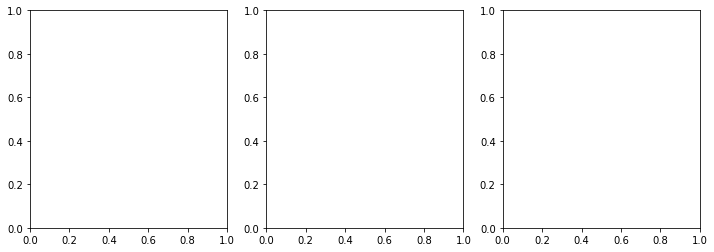

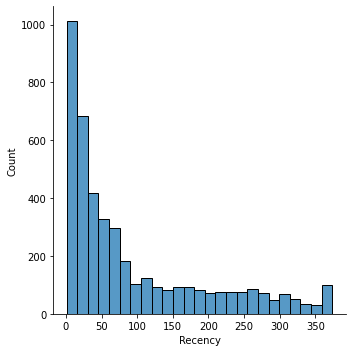

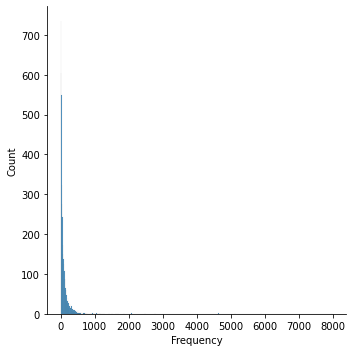

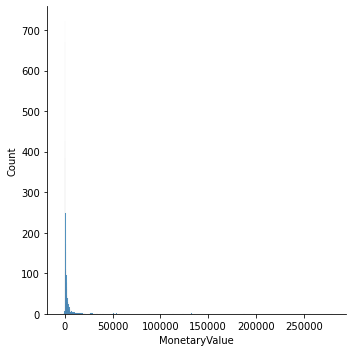

In [ ]:
## ve do thi 

fig,ax = plt.subplots(1, 3, figsize = (12,4))
sns.displot(df_customers['Recency'], ax = ax[0])
sns.displot(df_customers['Frequency'], ax = ax[1])
sns.displot(df_customers['MonetaryValue'], ax = ax[2])
plt.show()

In [ ]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(df_customers[x], ax=ax[0,0])
    sns.distplot(np.log(df_customers[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(df_customers[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(df_customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(df_customers[x].skew().round(2))
    print(np.log(df_customers[x]).skew().round(2))
    print(np.sqrt(df_customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(df_customers[x])[0]).skew().round(2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

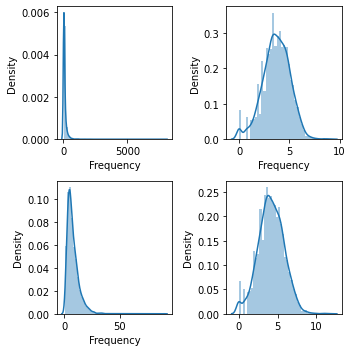

18.15
-0.24
3.2
0.0


In [ ]:
analyze_skewness('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

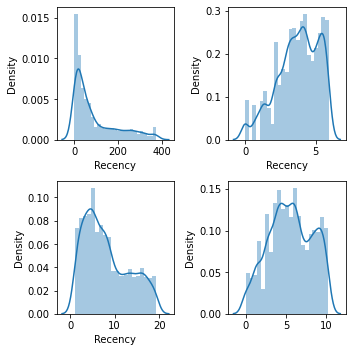

1.25
-0.53
0.59
-0.07


In [ ]:
analyze_skewness('Recency')

In [ ]:
## transform data
df_customers

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [ ]:
df_customers_t = pd.DataFrame()
df_customers_t['Recency'] = stats.boxcox(df_customers['Recency'])[0]
df_customers_t['Frequency'] = stats.boxcox(df_customers['Frequency'])[0]
df_customers_t['MonetaryValue'] = pd.Series(np.cbrt(df_customers['MonetaryValue'])).values
df_customers_t.head(10)

,Recency,Frequency,MonetaryValue
0,9.876619,0.707055,0.000000
1,0.735846,6.060363,16.273929
2,6.384920,3.794006,12.158183
3,3.826255,4.862047,12.068017
4,9.741979,3.075409,6.941001
5,4.942814,5.201183,11.561510
6,8.666162,1.442672,4.464745
7,8.988684,4.570059,10.257955
8,8.785339,2.762414,7.716085
9,4.147379,4.591627,14.113750


In [ ]:
### Scale Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_customers_t)

df_customers_t = scaler.transform(df_customers_t)
df_customers_t

array([[ 1.61117306, -2.09807168, -1.92564704],
       [-1.79759219,  1.15134635,  1.33054192],
       [ 0.30905346, -0.22431569,  0.50703791],
       ...,
       [-1.14097185, -0.85048403, -0.80307538],
       [-1.48869338,  2.36366091,  0.63453134],
       [-0.10466245,  0.391469  ,  0.52497099]])

In [ ]:
pd.DataFrame(df_customers_t).head()

,0,1,2
0,1.611173,-2.098072,-1.925647
1,-1.797592,1.151346,1.330542
2,0.309053,-0.224316,0.507038
3,-0.645121,0.423978,0.488997
4,1.560964,-0.660498,-0.536848


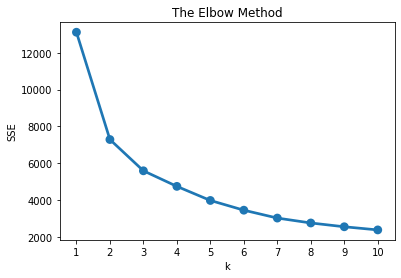

In [ ]:
# Dua du lieu vao KNN

# Chọn số cụm bằng Elbow
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_customers_t)
    sse[k] = kmeans.inertia_ 
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_customers_t)

KMeans(n_clusters=3, random_state=42)

In [ ]:
df_customers['Cluster'] = model.labels_
df_customers.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,326,2,0.00,1
12347.0,2,182,4310.00,0
12348.0,75,31,1797.24,2
12349.0,19,73,1757.55,2
12350.0,310,17,334.40,1


In [ ]:
df_customers.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'MonetaryValue':'mean'
    }
).round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,17.88,312.26,7356.52
1,185.51,19.15,351.30
2,42.63,67.12,1003.74
